# First-order all-pass filter

This is the first building block of a warped linear prediction filter.

Let's begin with its transfer function (CITATION NEEDED):

$$D(z) = \frac{z^{-1} - \lambda}{1 - \lambda z^{-1}}$$

By setting λ = 0, this reduces to a unit delay (CITATION NEEDED):

$$D(z) = z^{-1}$$

Unit delay means:
$$y[n] = D(z)x[n] = y[n] = x[n-1]$$

Let's observe this in practice.

In [1]:
import numpy, scipy, scipy.signal

fs = 48000
w, h = scipy.signal.freqz([0, 1], [1, 0])
f = fs * w / (2*numpy.pi)

The arguments to [freqz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html) are the numerator and denominator coefficients of the filter's transfer function in terms of z<sup>-1</sup>:

$$D(z) = z^{-1} = \frac{0z^{0} + 1z^{-1} + 0z^{-2} + ...}{1z^{0} - 0z^{-1} + 0z^{-2} + ...} \implies \frac{[0, 1]}{[1,0]}$$

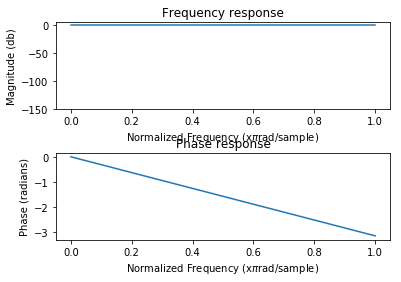

In [6]:
import matplotlib.pyplot as plt

h_dB = 20 * numpy.log10(numpy.abs(h))
plt.subplot(2, 1, 1)
plt.plot(w/max(w), h_dB)
plt.ylim(-150, 5)
plt.ylabel('Magnitude (db)')
plt.xlabel('Normalized Frequency (x$\pi$rad/sample)')
plt.title('Frequency response')
plt.subplot(2, 1, 2)
h_Phase = numpy.unwrap(numpy.arctan2(numpy.imag(h), numpy.real(h)))
plt.plot(w/max(w),h_Phase)
plt.ylabel('Phase (radians)')
plt.xlabel('Normalized Frequency (x$\pi$rad/sample)')
plt.title('Phase response')
plt.subplots_adjust(hspace=0.5)
plt.show()